In [ ]:
# 데이터 불러오기
import pandas as pd

train_behaviors = pd.read_csv('download/MINDsmall_train/behaviors.tsv', sep='\t', names=['ImpressionID', 'UserID', 'Time', 'History', 'Impressions'])
test_behaviors = pd.read_csv('download/MINDsmall_dev/behaviors.tsv', sep='\t', names=['ImpressionID', 'UserID', 'Time', 'History', 'Impressions'])

train_news = pd.read_csv('download/MINDsmall_train/news.tsv', sep='\t',
                        names=['NewsID', 'Category', 'SubCategory', 'Title', 'Abstract', 'URL', 'TitleEntities', 'AbstractEntities'])
test_news = pd.read_csv('download/MINDsmall_dev/news.tsv', sep='\t',
                       names=['NewsID', 'Category', 'SubCategory', 'Title', 'Abstract', 'URL', 'TitleEntities', 'AbstractEntities'])


In [2]:
# 사용자 ID 개수 
users_train = set(train_behaviors['UserID'])
users_test = set(test_behaviors['UserID'])
print(f"Total users: {len(users_train | users_test)}")
print(f"Train users: {len(users_train - users_test)}")
print(f"Test users: {len(users_test - users_train)}")

Total users: 94057
Train users: 44057
Test users: 44057


In [4]:
# 뉴스 ID 개수 
news_train = set(train_news['NewsID'])
news_test = set(test_news['NewsID'])
print(f"Total news: {len(news_train | news_test)}")
print(f"Train news: {len(news_train - news_test)}")
print(f"Test news: {len(news_test - news_train)}")

Total news: 65238
Train news: 22822
Test news: 13956


In [7]:
# impressions 뉴스 개수
# history 뉴스 개수

def parse_impressions(impression_str):
   return [imp.split('-')[0] for imp in impression_str.strip().split()]


behaviors_all = pd.concat([train_behaviors, test_behaviors]).reset_index(drop=True)


total_impression_count = 0
unique_impression_news = set()


for row in behaviors_all['Impressions']:
   news_ids = parse_impressions(row)
   total_impression_count += len(news_ids)
   unique_impression_news.update(news_ids)


click_count = 0
unique_clicked_news = set()
news_clicks = {}


for history in behaviors_all['History'].dropna():
   news_ids = history.strip().split()
   click_count += len(news_ids)
   unique_clicked_news.update(news_ids)
   for news_id in news_ids:
       news_clicks[news_id] = news_clicks.get(news_id, 0) + 1


print(f"Total impressions (중복 포함): {total_impression_count}")
print(f"Total history news (중복 포함): {click_count}")
print(f"Total impressions (중복 미포함): {len(unique_impression_news)}")
print(f"Total history news (중복 미포함): {len(unique_clicked_news)}")

Total impressions (중복 포함): 8584442
Total history news (중복 포함): 7470153
Total impressions (중복 미포함): 22771
Total history news (중복 미포함): 44908


In [6]:
# 클릭되지 않은 뉴스 중에서 history에도 없고, -1 (clicked) 아닌 뉴스 수집
# 즉, 클릭이 0인 뉴스 ID들 개수

click_zero_news_ids = set()

# behaviors_all을 순회하면서 추출
for _, row in behaviors_all.iterrows():
    history_set = set(str(row['History']).split()) if pd.notna(row['History']) else set()
    impressions = str(row['Impressions']).strip().split()

    for imp in impressions:
        if '-' not in imp:
            continue
        news_id, label = imp.split('-')
        if label != '1' and news_id not in history_set:
            click_zero_news_ids.add(news_id)

# 전체 뉴스 데이터프레임 만들기
news_all = pd.concat([train_news, test_news]).drop_duplicates('NewsID')

# 뉴스 ID 기준으로 필터링
click_zero_news_df = news_all[news_all['NewsID'].isin(click_zero_news_ids)]
print(f"click=0 뉴스 개수: {len(click_zero_news_df)}")


click=0 뉴스 개수: 22585


In [8]:
only_in_history = unique_clicked_news - unique_impression_news
print(f"History에만 있는 뉴스 개수: {len(only_in_history)}")

History에만 있는 뉴스 개수: 42467


In [ ]:
# (history에 클릭된 적 없는) 클릭 횟수 별 뉴스 개수

news_all = pd.concat([train_news, test_news]).drop_duplicates(subset='NewsID').reset_index(drop=True)

click_counts = {}

for history in behaviors_all['History'].dropna():
   for news_id in history.strip().split():
       click_counts[news_id] = click_counts.get(news_id, 0) + 1

all_news_ids = set(news_all['NewsID'])

for news_id in all_news_ids:
   if news_id not in click_counts:
       click_counts[news_id] = 0

click_groups = {}

for news_id, count in click_counts.items():
   if count not in click_groups:
       click_groups[count] = []
   click_groups[count].append(news_id)

sorted_click_groups = sorted(click_groups.items())  
for click_count, news_ids in sorted_click_groups:
   print(f"클릭 {click_count}회: 뉴스 {len(news_ids)}개")

클릭 0회: 뉴스 20330개
클릭 1회: 뉴스 5993개
클릭 2회: 뉴스 4020개
클릭 3회: 뉴스 2886개
클릭 4회: 뉴스 2227개
클릭 5회: 뉴스 1837개
클릭 6회: 뉴스 1491개
클릭 7회: 뉴스 1318개
클릭 8회: 뉴스 1077개
클릭 9회: 뉴스 1028개
클릭 10회: 뉴스 901개
클릭 11회: 뉴스 837개
클릭 12회: 뉴스 701개
클릭 13회: 뉴스 634개
클릭 14회: 뉴스 622개
클릭 15회: 뉴스 550개
클릭 16회: 뉴스 502개
클릭 17회: 뉴스 502개
클릭 18회: 뉴스 460개
클릭 19회: 뉴스 363개
클릭 20회: 뉴스 333개
클릭 21회: 뉴스 285개
클릭 22회: 뉴스 298개
클릭 23회: 뉴스 266개
클릭 24회: 뉴스 282개
클릭 25회: 뉴스 232개
클릭 26회: 뉴스 203개
클릭 27회: 뉴스 203개
클릭 28회: 뉴스 208개
클릭 29회: 뉴스 200개
클릭 30회: 뉴스 196개
클릭 31회: 뉴스 184개
클릭 32회: 뉴스 174개
클릭 33회: 뉴스 148개
클릭 34회: 뉴스 178개
클릭 35회: 뉴스 147개
클릭 36회: 뉴스 143개
클릭 37회: 뉴스 146개
클릭 38회: 뉴스 133개
클릭 39회: 뉴스 138개
클릭 40회: 뉴스 121개
클릭 41회: 뉴스 115개
클릭 42회: 뉴스 109개
클릭 43회: 뉴스 99개
클릭 44회: 뉴스 92개
클릭 45회: 뉴스 116개
클릭 46회: 뉴스 97개
클릭 47회: 뉴스 81개
클릭 48회: 뉴스 81개
클릭 49회: 뉴스 100개
클릭 50회: 뉴스 91개
클릭 51회: 뉴스 97개
클릭 52회: 뉴스 94개
클릭 53회: 뉴스 78개
클릭 54회: 뉴스 86개
클릭 55회: 뉴스 69개
클릭 56회: 뉴스 81개
클릭 57회: 뉴스 84개
클릭 58회: 뉴스 75개
클릭 59회: 뉴스 83개
클릭 60회: 뉴스 69개
클릭 61회: 뉴스 68개
클릭 62회: 뉴스 65개
클릭 63회: 뉴

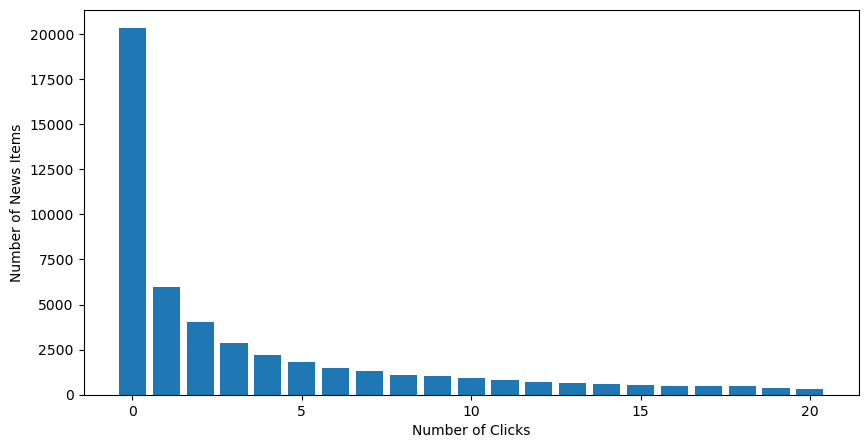

In [ ]:
# 뉴스 기사들의 "클릭 수 분포"를 시각화
import matplotlib.pyplot as plt

x = [click_count for click_count, _ in sorted_click_groups[:21]]
y = [len(news_ids) for _, news_ids in sorted_click_groups[:21]]

plt.figure(figsize=(10, 5))
plt.bar(x, y)

# (x: 클릭 수, y: 해당 클릭 수를 가진 뉴스 개수)
plt.xlabel('Number of Clicks')
plt.ylabel('Number of News Items')
plt.show()

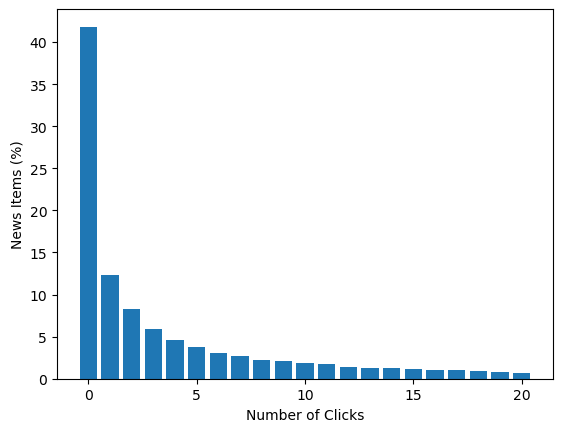

In [ ]:
# "클릭 수별 뉴스 개수 그래프"를 백분율(%)로 변환

import matplotlib.pyplot as plt

x = [click_count for click_count, _ in sorted_click_groups[:21]]
y_raw = [len(news_ids) for _, news_ids in sorted_click_groups[:21]]

total = sum(y_raw)
y = [v / total * 100 for v in y_raw]

plt.bar(x, y)
plt.xlabel('Number of Clicks')
plt.ylabel('News Items (%)')
plt.show()

94057
    Group  Clicked
0       0    34165
1       1    20287
2       2    16220
3       3    13828
4       4    12181
..    ...      ...
90     90     1000
91     91     1000
92     92     1000
93     93     1000
94     94       57

[95 rows x 2 columns]


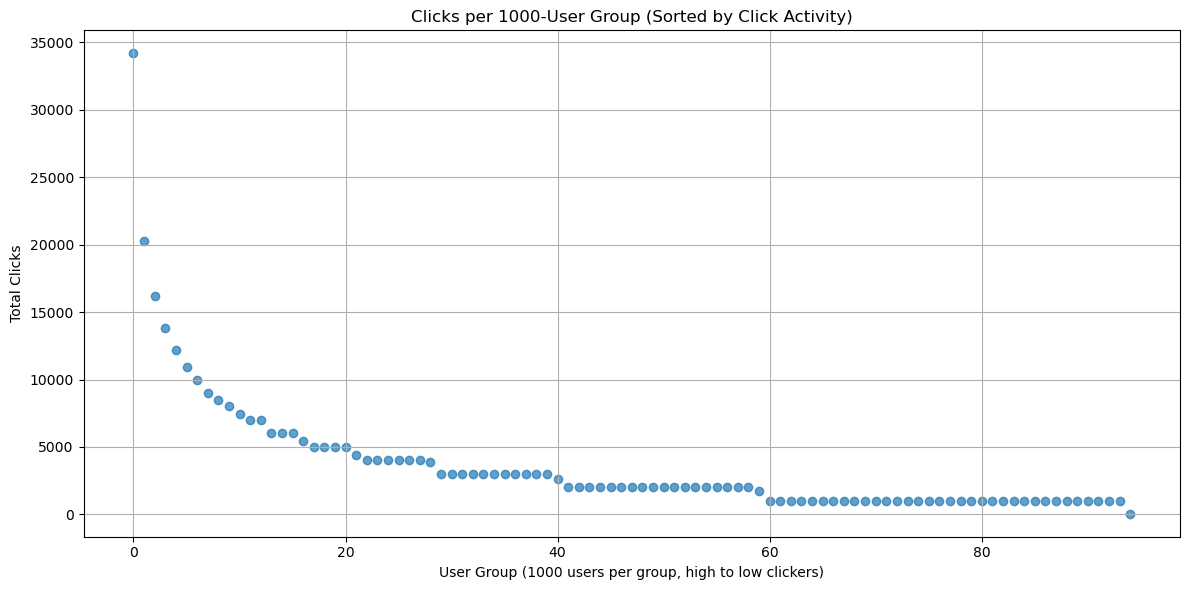

In [ ]:
# 유저의 클릭 활동량을 분석하고 시각화
# 클릭을 많이 한 유저부터 순서대로 정렬해서, 1000명 단위로 그룹화하여 그룹별 클릭 수 총합을 시각화

records = []
print(behaviors_all['UserID'].nunique())
for _, row in behaviors_all.iterrows():
    user_id = row['UserID']
    for imp in row['Impressions'].strip().split():
        news_id, label = imp.split('-')
        records.append((user_id, int(label)))

# 클릭 수 기준 유저 정렬 후 1000명 단위 그룹화
click_df = pd.DataFrame(records, columns=['UserID', 'Clicked'])                # 클릭 여부 기록
user_clicks = click_df.groupby('UserID')['Clicked'].sum().reset_index()       # 유저별 총 클릭 수 계산
user_clicks_sorted = user_clicks.sort_values(by='Clicked', ascending=False).reset_index(drop=True)  # 클릭 많은 순 정렬
user_clicks_sorted['Group'] = user_clicks_sorted.index // 1000                # 1000명 단위로 그룹 넘버 부여
group_clicks = user_clicks_sorted.groupby('Group')['Clicked'].sum().reset_index()  # 그룹별 클릭 합계
print(group_clicks)
plt.figure(figsize=(12, 6))
plt.scatter(group_clicks['Group'], group_clicks['Clicked'], alpha=0.7)
plt.xlabel('User Group (1000 users per group, high to low clickers)')
plt.ylabel('Total Clicks')
plt.title('Clicks per 1000-User Group (Sorted by Click Activity)')
plt.grid(True)
plt.tight_layout()
plt.show()


65238
    Group  Clicked  NewsCount
0       0   286373       1000
1       1    35767       1000
2       2    12701       1000
3       3     5275       1000
4       4     2661       1000
..    ...      ...        ...
61     61        0       1000
62     62        0       1000
63     63        0       1000
64     64        0       1000
65     65        0        238

[66 rows x 3 columns]


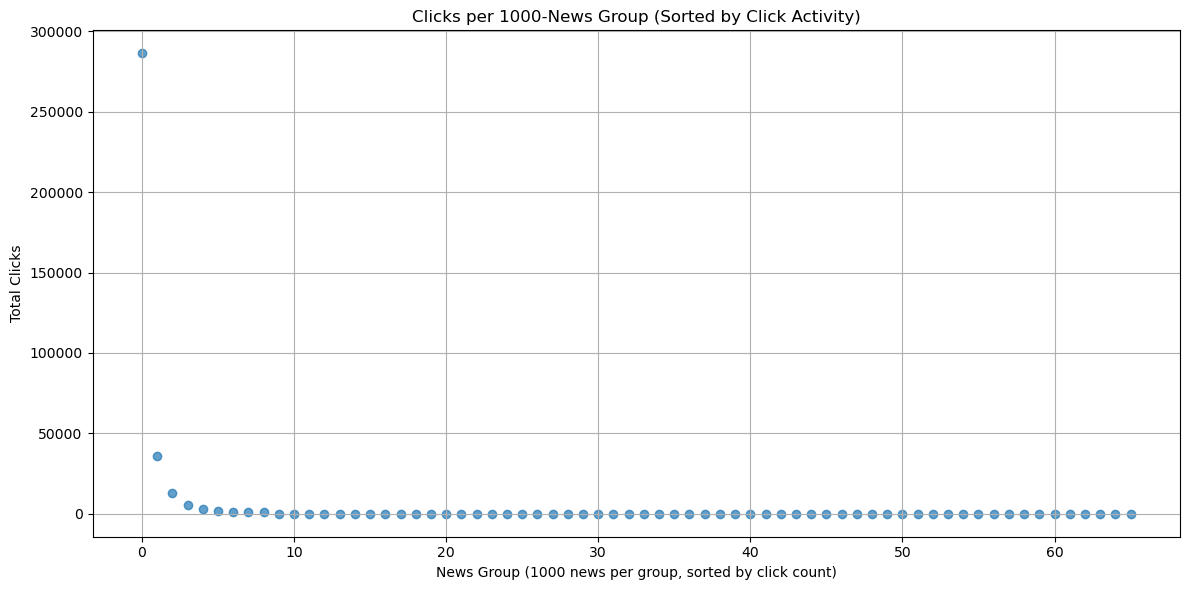

In [ ]:
# 뉴스 기사들을 클릭 수 기준으로 정렬하고, 1000개씩 그룹화하여 각 그룹의 총 클릭 수를 분석하고 시각화

import pandas as pd
import matplotlib.pyplot as plt

# Step 1: 전체 뉴스 결합
news_df = pd.concat([train_news, test_news], ignore_index=True)
news_df = news_df.drop_duplicates(subset='NewsID')  # 중복 제거
print(len(news_df))
# Step 2: 클릭된 뉴스 ID 수집
clicked_news_ids = []
for _, row in behaviors_all.iterrows():
    for imp in row['Impressions'].strip().split():
        news_id, label = imp.split('-')
        if label == '1':  # 클릭된 것만
            clicked_news_ids.append(news_id)

# Step 3: 클릭 수 집계 (뉴스ID별)
click_df = pd.DataFrame(clicked_news_ids, columns=['NewsID'])
click_counts = click_df.value_counts().reset_index(name='Clicked')

# Step 4: 전체 뉴스 기준으로 병합 (없는 건 클릭수 0)
news_clicks = news_df[['NewsID']].merge(click_counts, on='NewsID', how='left')
news_clicks['Clicked'] = news_clicks['Clicked'].fillna(0).astype(int)

# Step 5: 클릭 수 기준 정렬 + 그룹 부여
news_clicks_sorted = news_clicks.sort_values(by='Clicked', ascending=False).reset_index(drop=True)
news_clicks_sorted['Group'] = news_clicks_sorted.index // 1000

# Step 6: 그룹별 총 클릭 수 및 뉴스 수 계산
group_clicks = news_clicks_sorted.groupby('Group').agg(
    Clicked=('Clicked', 'sum'),
    NewsCount=('NewsID', 'count')
).reset_index()

# Step 7: 출력 및 시각화
print(group_clicks)

plt.figure(figsize=(12, 6))
plt.scatter(group_clicks['Group'], group_clicks['Clicked'], alpha=0.7)
plt.xlabel('News Group (1000 news per group, sorted by click count)')
plt.ylabel('Total Clicks')
plt.title('Clicks per 1000-News Group (Sorted by Click Activity)')
plt.grid(True)
plt.tight_layout()
plt.show()
